<a href="https://colab.research.google.com/github/ManjuKonatala/FML/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.Import rquired libraries:

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/sample_data/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

2.Feature Scaling:

In [ ]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)']);
df_scale.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


3.Find optimum no.of clusters:

In [ ]:
K=range(2,11)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

4.Elbow method to get k value:

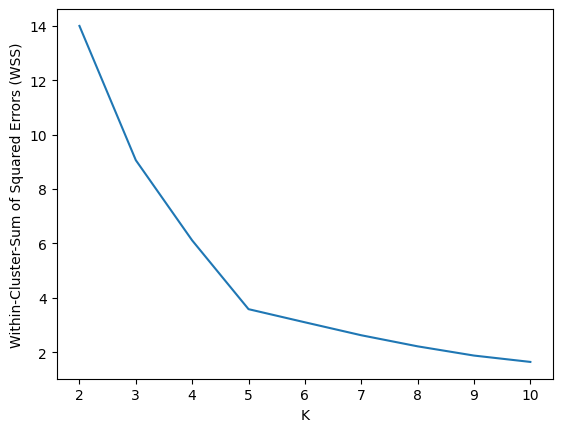

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

5.Applying kmeans with 5 clusters:

In [ ]:
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

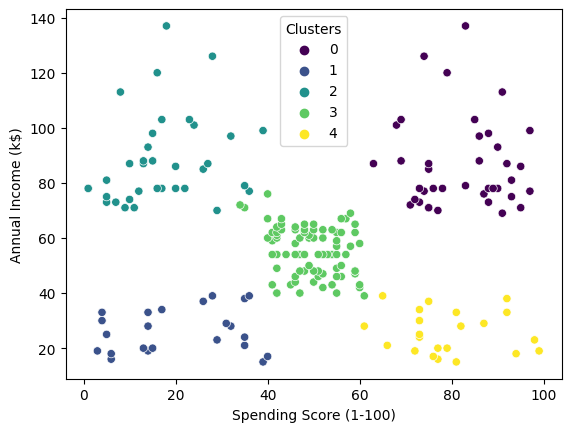

In [ ]:
df['Clusters'] = km.labels_

sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')